<a href="https://colab.research.google.com/github/Jamshaid9291/NN-Performance-Comparison-on-Iris-Dataset-with-diff-Loss-ftns/blob/main/NN_Performance_comp_with_diff_LOSS_Ftns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Final Code**


Training with categorical_crossentropy + adam
Final Accuracy: 0.9583

Training with categorical_crossentropy + sgd
Final Accuracy: 0.8333

Training with categorical_crossentropy + rmsprop
Final Accuracy: 0.9583

Training with mean_squared_error + adam
Final Accuracy: 1.0000

Training with mean_squared_error + sgd
Final Accuracy: 0.7083

Training with mean_squared_error + rmsprop
Final Accuracy: 0.8333

Training with binary_crossentropy + adam
Final Accuracy: 0.9583

Training with binary_crossentropy + sgd
Final Accuracy: 0.5417

Training with binary_crossentropy + rmsprop
Final Accuracy: 0.8750


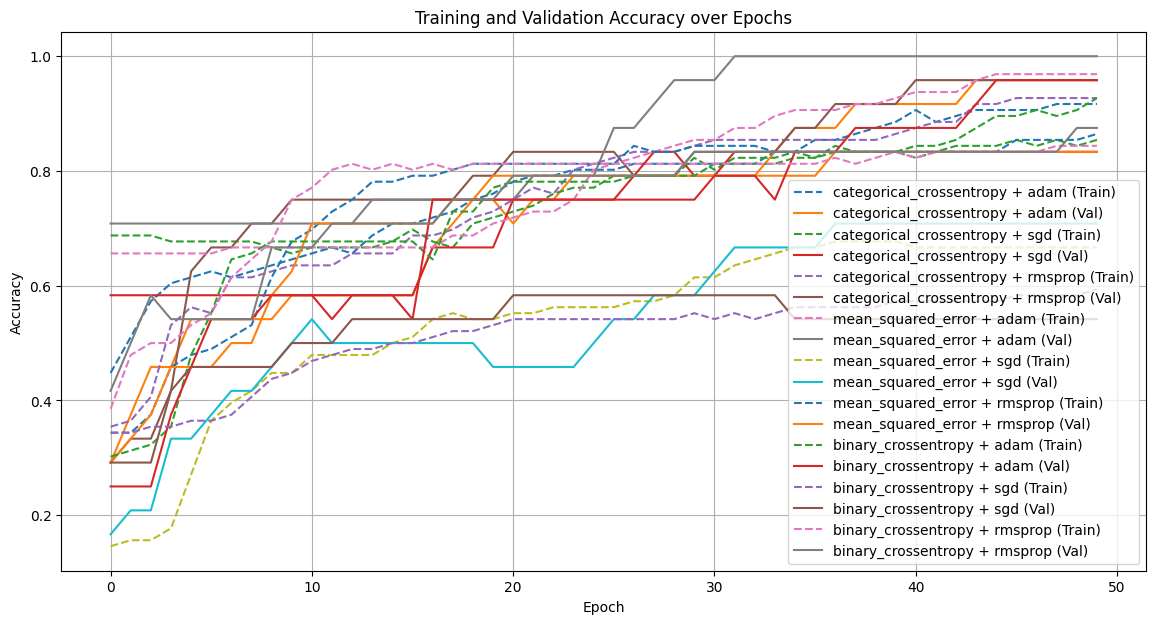

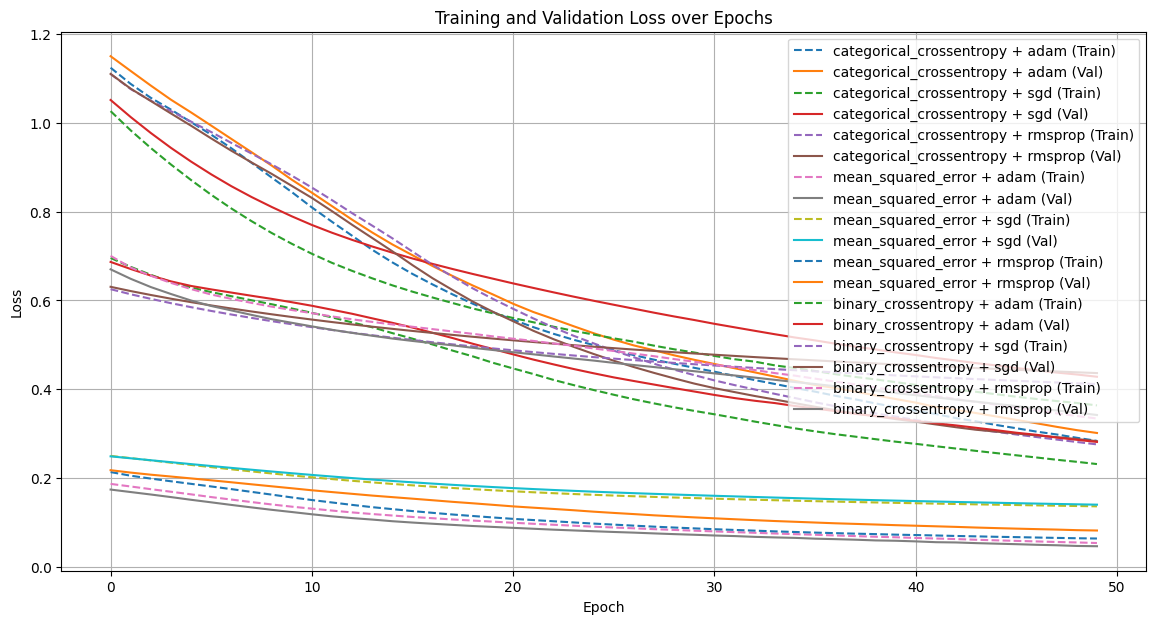


Final Accuracy Summary:
categorical_crossentropy + adam: 0.9583
categorical_crossentropy + sgd: 0.8333
categorical_crossentropy + rmsprop: 0.9583
mean_squared_error + adam: 1.0000
mean_squared_error + sgd: 0.7083
mean_squared_error + rmsprop: 0.8333
binary_crossentropy + adam: 0.9583
binary_crossentropy + sgd: 0.5417
binary_crossentropy + rmsprop: 0.8750


In [ ]:
# Required libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Use a unique student ID to generate consistent random subset
student_id = 2
np.random.seed(student_id)

# Create a personalized 80% subset of the data
X_sub, _, y_sub, _ = train_test_split(X, y, train_size=0.8, stratify=y, random_state=student_id)

# Convert to DataFrame for clarity
df = pd.DataFrame(X_sub, columns=feature_names)
df['target'] = y_sub

# Preprocessing: Feature scaling and one-hot encoding
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sub)
y_encoded = to_categorical(y_sub, num_classes=3)

# Train-test split for evaluation
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=student_id)

# Function to create model
def create_model(loss_function='categorical_crossentropy', optimizer='adam'):
    model = Sequential([
        Input(shape=(4,)),
        Dense(8, activation='relu'),
        Dense(6, activation='relu'),
        Dense(3, activation='softmax')
    ])
    model.compile(loss=loss_function, optimizer=optimizer, metrics=['accuracy'])
    return model

# Define different loss functions and optimizers to try
loss_functions = ['categorical_crossentropy', 'mean_squared_error', 'binary_crossentropy']
optimizers = ['adam', 'sgd', 'rmsprop']

# Store history for analysis
results = {}

# Loop through combinations of loss functions and optimizers
for loss_fn in loss_functions:
    for opt in optimizers:
        key = f"{loss_fn} + {opt}"
        print(f"\nTraining with {key}")

        # Note: BinaryCrossentropy with one-hot encoding is not ideal for multiclass but used for assignment
        model = create_model(loss_function=loss_fn, optimizer=opt)
        history = model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=0, validation_data=(X_test, y_test))

        results[key] = history

        # Print final test accuracy
        _, acc = model.evaluate(X_test, y_test, verbose=0)
        print(f"Final Accuracy: {acc:.4f}")

# Plot training and validation accuracy for each configuration
plt.figure(figsize=(14, 7))
for key, history in results.items():
    plt.plot(history.history['accuracy'], label=f"{key} (Train)", linestyle='--')
    plt.plot(history.history['val_accuracy'], label=f"{key} (Val)")
plt.title('Training and Validation Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss for each configuration
plt.figure(figsize=(14, 7))
for key, history in results.items():
    plt.plot(history.history['loss'], label=f"{key} (Train)", linestyle='--')
    plt.plot(history.history['val_loss'], label=f"{key} (Val)")
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Comparative final accuracy table
print("\nFinal Accuracy Summary:")
for key, history in results.items():
    final_acc = history.history['val_accuracy'][-1]
    print(f"{key}: {final_acc:.4f}")
